# **Redes Neuronales Artificiales**

# Ejemplo de una RNA con Tensor Flow y Keras

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Datos de entrenamiento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
kelvin = celsius + 273.15  # Conversión de Celsius a Kelvin

# Definir el modelo
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

# Compilar el modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

# Entrenar el modelo
historial = modelo.fit(celsius, kelvin, epochs=1000, verbose=1)

# Hacer predicciones
celsius_test = np.array([0, 100, 200], dtype=float)
kelvin_predictions = modelo.predict(celsius_test)

# Mostrar resultados
for c, k in zip(celsius_test, kelvin_predictions):
    print(f'{c} grados Celsius se predice que son aproximadamente {k[0]:.2f} Kelvin')



Epoch 1/1000
1/1 [==============================] - 1s 656ms/step - loss: 77264.8828
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 75583.2891
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 73803.1875
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 71986.5391
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 70406.8281
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 69641.0000
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 70018.5781
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 70043.6953
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 69140.9766
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 68036.0703
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 67242.1094
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 66775.7

1/1 [==============================] - 0s 112ms/step
0.0 grados Celsius se predice que son aproximadamente 273.15 Kelvin
100.0 grados Celsius se predice que son aproximadamente 373.28 Kelvin
200.0 grados Celsius se predice que son aproximadamente 473.42 Kelvin


Probando que el algoritmo este bien

In [9]:
# Generar datos de prueba
celsius_test = np.array([5, 10, 25, 30], dtype=float)
kelvin_test = celsius_test + 273.15  # Conversión de Celsius a Kelvin para los datos de prueba

# Evaluar el modelo en el conjunto de prueba
loss = modelo.evaluate(celsius_test, kelvin_test)
print(f'Pérdida en el conjunto de prueba: {loss:.2f}')

# Hacer predicciones en el conjunto de prueba
kelvin_predictions_test = modelo.predict(celsius_test)

# Mostrar resultados
for c, k_actual, k_pred in zip(celsius_test, kelvin_test, kelvin_predictions_test):
    print(f'{c} grados Celsius: Valor real = {k_actual:.2f} Kelvin, Predicción = {k_pred[0]:.2f} Kelvin')


1/1 [==============================] - 0s 98ms/step - loss: 6.7161e-04
Pérdida en el conjunto de prueba: 0.00
1/1 [==============================] - 0s 20ms/step
5.0 grados Celsius: Valor real = 278.15 Kelvin, Predicción = 278.15 Kelvin
10.0 grados Celsius: Valor real = 283.15 Kelvin, Predicción = 283.16 Kelvin
25.0 grados Celsius: Valor real = 298.15 Kelvin, Predicción = 298.18 Kelvin
30.0 grados Celsius: Valor real = 303.15 Kelvin, Predicción = 303.19 Kelvin


Graficando el mse

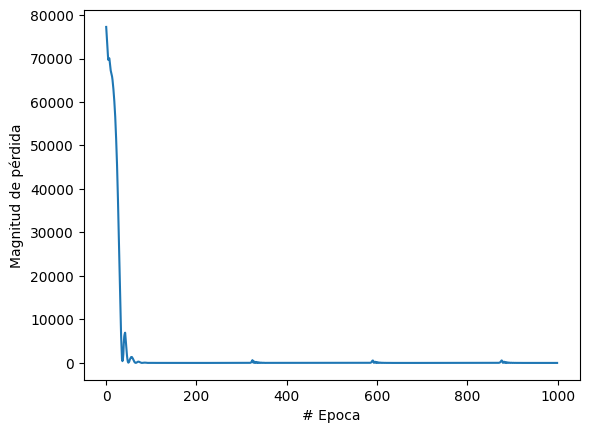

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

#Ejemplo de una RNA con Scikit Learn



In [31]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Datos de entrenamiento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
kelvin = celsius + 273.15  # Conversión de Celsius a Kelvin

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(celsius.reshape(-1, 1), kelvin, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=500, random_state=42, alpha=0.002, learning_rate_init=0.001)

model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
kelvin_predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
mse = mean_squared_error(y_test, kelvin_predictions)
print(f'Mean Squared Error en el conjunto de prueba: {mse:.2f}')

# Hacer predicciones para nuevos datos
celsius_new = np.array([0, 100, 200], dtype=float).reshape(-1, 1)
kelvin_new_predictions = model.predict(celsius_new)

# Mostrar resultados
for c, k_pred in zip(celsius_new.flatten(), kelvin_new_predictions):
    print(f'{c} grados Celsius se predice que son aproximadamente {k_pred:.2f} Kelvin')


Mean Squared Error en el conjunto de prueba: 27486.04
0.0 grados Celsius se predice que son aproximadamente 271.85 Kelvin
100.0 grados Celsius se predice que son aproximadamente 759.26 Kelvin
200.0 grados Celsius se predice que son aproximadamente 1483.39 Kelvin


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#Ejemplo de una RNA con Pytorch

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Datos de entrenamiento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=np.float32)
kelvin = celsius + 273.15

# Convertir datos a tensores de PyTorch
X_train = torch.from_numpy(celsius.reshape(-1, 1))
y_train = torch.from_numpy(kelvin.reshape(-1, 1))

# Definir la arquitectura del modelo
class CelsiusToKelvinModel(nn.Module):
    def __init__(self):
        super(CelsiusToKelvinModel, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        return self.fc3(x)

# Instanciar el modelo
model = CelsiusToKelvinModel()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.055)  # Ajusta weight_decay según sea necesario


# Entrenamiento del modelo
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)

    # Calcular la pérdida
    loss = criterion(outputs, y_train)

    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Hacer predicciones
celsius_test = np.array([0, 100, 200], dtype=np.float32)
X_test = torch.from_numpy(celsius_test.reshape(-1, 1))
kelvin_predictions = model(X_test)

# Mostrar resultados
for c, k_pred in zip(celsius_test, kelvin_predictions.detach().numpy()):
    print(f'{c} grados Celsius se predice que son aproximadamente {k_pred[0]:.2f} Kelvin')


Epoch [50/1000], Loss: 65262.3398
Epoch [100/1000], Loss: 35246.9492
Epoch [150/1000], Loss: 24811.3926
Epoch [200/1000], Loss: 24463.5977
Epoch [250/1000], Loss: 24149.2930
Epoch [300/1000], Loss: 23785.6074
Epoch [350/1000], Loss: 23364.4590
Epoch [400/1000], Loss: 22873.3164
Epoch [450/1000], Loss: 22263.7031
Epoch [500/1000], Loss: 21208.0820
Epoch [550/1000], Loss: 19393.0273
Epoch [600/1000], Loss: 16752.2207
Epoch [650/1000], Loss: 13354.2441
Epoch [700/1000], Loss: 9003.7129
Epoch [750/1000], Loss: 4574.6899
Epoch [800/1000], Loss: 1950.2815
Epoch [850/1000], Loss: 644.0985
Epoch [900/1000], Loss: 160.8541
Epoch [950/1000], Loss: 26.8447
Epoch [1000/1000], Loss: 6.0226
0.0 grados Celsius se predice que son aproximadamente 267.09 Kelvin
100.0 grados Celsius se predice que son aproximadamente 546.84 Kelvin
200.0 grados Celsius se predice que son aproximadamente 955.27 Kelvin


# Backpropagation

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_cateimpgorical

# Cargar y preprocesar los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Crear el modelo de la red neuronal
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nAccuracy on test data: {test_acc}')

# Hacer predicciones con el modelo
predictions = model.predict(test_images[:5])
print('\nPredictions:')
print(predictions)


Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.1766 - accuracy: 0.9454 - val_loss: 0.0580 - val_accuracy: 0.9802
Epoch 2/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0496 - accuracy: 0.9848 - val_loss: 0.0383 - val_accuracy: 0.9871
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0322 - val_accuracy: 0.9889
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0238 - accuracy: 0.9925

Accuracy on test data: 0.9925000071525574
1/1 [==============================] - 0s 119ms/step

Predictions:
[[5.0217195e-11 4.5793513e-08 3.3701119e-07 6.3225684e-06 1.5659351e-08
  9.3187023e-09 2.1218457e-14 9.9999321e-01 6.3301151e-08 1.0386770e-07]
 [8.6175589e-08 5.5801883e-07 9.9999917e-01 1.3344646e-10 3.9836587e-09
  

# **Red Convolucional**

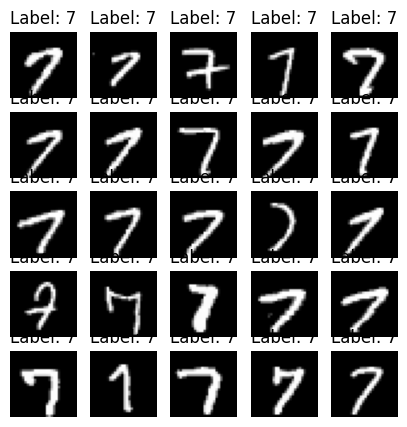

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (_, _) = mnist.load_data()

# Función para mostrar imágenes en un subplot
def plot_images(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            axes[i, j].imshow(images[index], cmap='gray')
            axes[i, j].set_title(f'Label: {labels[index]}')
            axes[i, j].axis('off')
    plt.show()

# Elegir un número específico para visualizar
number_to_visualize = 7

# Seleccionar imágenes del conjunto de datos
selected_images = train_images[train_labels == number_to_visualize][:25]
selected_labels = train_labels[train_labels == number_to_visualize][:25]

# Visualizar las imágenes en un subplot
plot_images(selected_images, selected_labels, 5, 5)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 47s 60ms/step - loss: 0.2112 - accuracy: 0.9361 - val_loss: 0.0768 - val_accuracy: 0.9778
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0562 - val_accuracy: 0.9822
Epoch 3/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0485 - val_accuracy: 0.9862
Epoch 4/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0312 - accuracy: 0.9906
Precisión en el conjunto de prueba: 0.9905999898910522
1/1 [==============================] - 0s 82ms/step


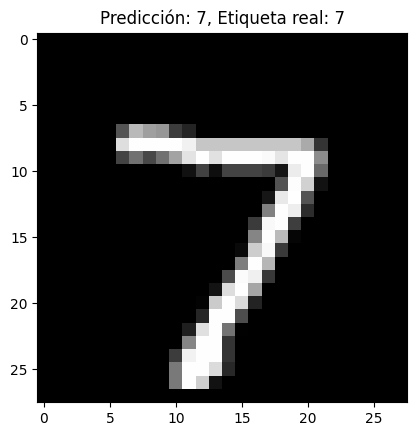

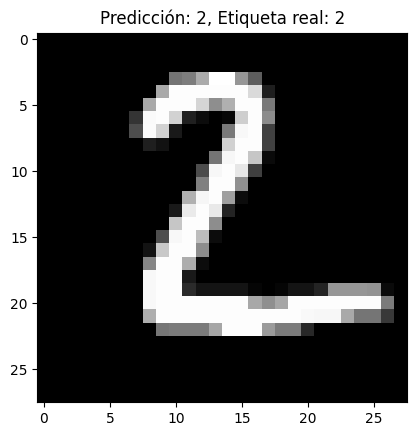

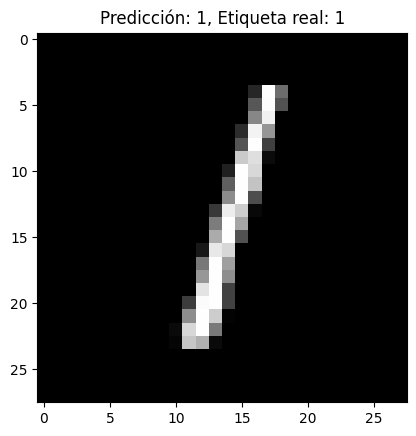

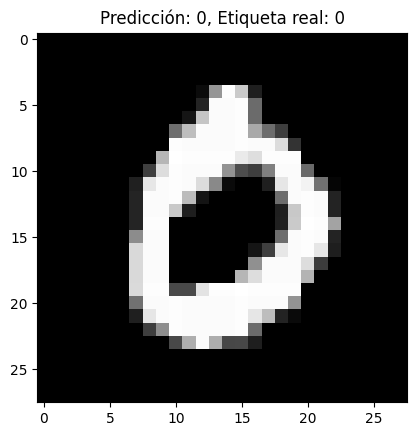

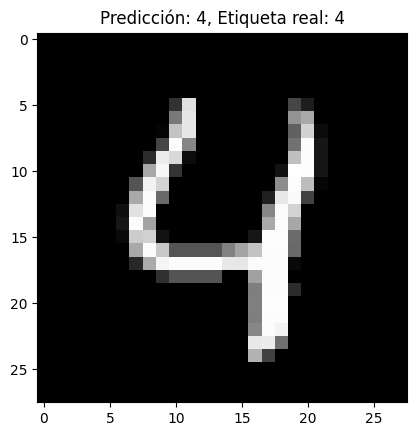

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST (dígitos escritos a mano)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Definir la arquitectura de la red convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Añadir capas totalmente conectadas para la clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc}')

# Hacer predicciones en una muestra del conjunto de prueba
predictions = model.predict(test_images[:5])

# Visualizar algunas predicciones y las imágenes correspondientes
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {tf.argmax(predictions[i])}, Etiqueta real: {test_labels[i]}')
    plt.show()


# Red Neuronal Recurrente

Epoch 1/50
45/45 [==============================] - 3s 23ms/step - loss: 0.4133 - val_loss: 0.2677
Epoch 2/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0938 - val_loss: 0.0156
Epoch 3/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.0205
Epoch 4/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0137
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.0141
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0137
Epoch 7/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.0129
Epoch 8/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.0128
Epoch 9/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 10/50
45/45 [==============================] - 0s 4ms/step - loss: 0.0151 - val_loss: 0.0128
Epoch 11/50
45/45 

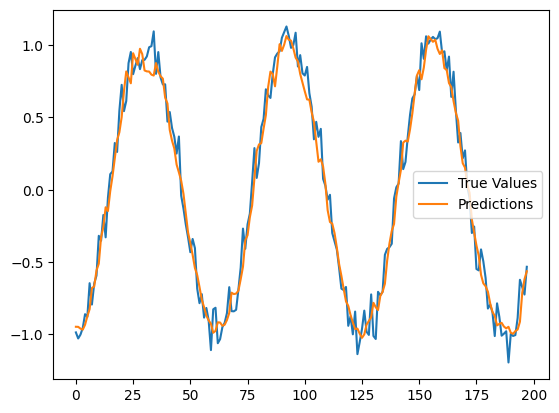

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Generar datos sintéticos (serie temporal)
np.random.seed(42)
time = np.arange(0, 100, 0.1)
sin_wave = np.sin(time) + 0.1 * np.random.randn(len(time))

# Crear secuencias y etiquetas
sequence_length = 10
sequences = []
labels = []

for i in range(len(sin_wave) - sequence_length):
    seq = sin_wave[i:i+sequence_length]
    label = sin_wave[i+sequence_length]
    sequences.append(seq)
    labels.append(label)

X = np.array(sequences)
y = np.array(labels)

# Reshape para que sea compatible con la entrada de la RNN
X = X.reshape(-1, sequence_length, 1)

# Dividir en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Definir el modelo de RNN
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(sequence_length, 1), activation='relu'))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Loss en el conjunto de prueba: {loss}')

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Visualizar resultados
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()


# Algoritmos de Aprendizaje por refuerzo

In [58]:
!pip install gym


In [4]:
import numpy as np
import gym

# Crear el entorno FrozenLake
#env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='human')
env = gym.make('FrozenLake-v1', is_slippery=False)

# Inicializar la tabla Q con ceros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Configurar los parámetros del algoritmo Q-Learning
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 2000

# Ejecutar el algoritmo Q-Learning
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while True:
        # Elegir una acción utilizando la política epsilon-greedy
        if np.random.rand() < 0.5:
            action = env.action_space.sample()  # exploración aleatoria
        else:
            action = np.argmax(Q[state, :])  # explotación basada en la tabla Q

        # Realizar la acción y obtener la recompensa y el próximo estado
        next_state, reward, done, _ = env.step(action)

        # Actualizar la tabla Q utilizando la ecuación de Bellman
        Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                            learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

        total_reward += reward
        state = next_state

        if done:
            break

    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

# Evaluar la política aprendida
state = env.reset()
while True:
    action = np.argmax(Q[state, :])
    next_state, _, done, _ = env.step(action)
    env.render()

    state = next_state

    if done:
        break


Episode 0, Total Reward: 0.0
Episode 100, Total Reward: 0.0
Episode 200, Total Reward: 0.0
Episode 300, Total Reward: 0.0
Episode 400, Total Reward: 1.0
Episode 500, Total Reward: 1.0
Episode 600, Total Reward: 1.0
Episode 700, Total Reward: 0.0
Episode 800, Total Reward: 0.0
Episode 900, Total Reward: 0.0
Episode 1000, Total Reward: 0.0
Episode 1100, Total Reward: 0.0
Episode 1200, Total Reward: 0.0
Episode 1300, Total Reward: 0.0
Episode 1400, Total Reward: 0.0
Episode 1500, Total Reward: 1.0
Episode 1600, Total Reward: 1.0
Episode 1700, Total Reward: 1.0
Episode 1800, Total Reward: 1.0
Episode 1900, Total Reward: 0.0
